# Declaration of Originality

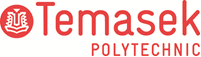

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Loh Yi Xuan (2404544E)
* Tutorial Group                : T04
* Tutor						    : Mr. Emile Sabastian
* Submission Date               : 11 Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [31]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: To predict a student's final score based on their AI usage patterns (Time, Dependency, Tools) and traditional study factors (Consistency, Sleep, Study Hours). By identifying which factors most significantly impact performance, educational institutions can provide better guidance on the using AI in learning.

# 2. Data Understanding

## 2.1 Load dataset

In [32]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'ai_impact_student_performance_dataset.csv'
df = pd.read_csv(FILE_PATH)
df 

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,23,Male,3rd Year,3.0,0,178,Gemini,NaN,6,...,5,8.1,19.2,8.3,1.9,1.0,10,49.7,1,Low
7996,7997,21,Other,1st Year,3.3,0,63,Claude,Exam Prep,10,...,6,5.7,3.0,5.0,1.3,2.9,5,58.4,1,Medium
7997,7998,24,Male,3rd Year,1.6,0,113,ChatGPT,Coding,5,...,6,4.5,-18.0,5.0,3.5,0.1,9,69.1,1,Medium
7998,7999,22,Female,2nd Year,5.5,0,21,Copilot,Coding,5,...,8,3.4,-19.1,4.7,5.9,0.4,7,49.2,1,Low


## 2.2 Summary Statistics

In [14]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       8000 non-null   int64  
 1   age                              8000 non-null   int64  
 2   gender                           8000 non-null   object 
 3   grade_level                      8000 non-null   object 
 4   study_hours_per_day              8000 non-null   float64
 5   uses_ai                          8000 non-null   int64  
 6   ai_usage_time_minutes            8000 non-null   int64  
 7   ai_tools_used                    6638 non-null   object 
 8   ai_usage_purpose                 6654 non-null   object 
 9   ai_dependency_score              8000 non-null   int64  
 10  ai_generated_content_percentage  8000 non-null   int64  
 11  ai_prompts_per_week              8000 non-null   int64  
 12  ai_ethics_score     

In [15]:
## Check for missing data
df.isna().sum()

student_id                            0
age                                   0
gender                                0
grade_level                           0
study_hours_per_day                   0
uses_ai                               0
ai_usage_time_minutes                 0
ai_tools_used                      1362
ai_usage_purpose                   1346
ai_dependency_score                   0
ai_generated_content_percentage       0
ai_prompts_per_week                   0
ai_ethics_score                       0
last_exam_score                       0
assignment_scores_avg                 0
attendance_percentage                 0
concept_understanding_score           0
study_consistency_index               0
improvement_rate                      0
sleep_hours                           0
social_media_hours                    0
tutoring_hours                        0
class_participation_score             0
final_score                           0
passed                                0


In [16]:
## Describe data distribution
df.describe(include='all')

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
count,8000.00000,8000.00000,8000,8000,8000.000000,8000.000000,8000.000000,6638,6654,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,NaN,3,6,NaN,NaN,NaN,5,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Male,1st Year,NaN,NaN,NaN,ChatGPT+Gemini,Exam Prep,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,NaN,3908,1356,NaN,NaN,NaN,1399,1368,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705
mean,4000.50000,18.96725,NaN,NaN,3.286938,0.641000,88.989875,NaN,NaN,5.515125,...,5.484750,5.516450,10.127325,6.465025,3.010600,2.523387,5.463375,56.811988,0.889250,NaN
std,2309.54541,3.15316,NaN,NaN,1.582171,0.479737,52.184077,NaN,NaN,2.883064,...,2.898546,2.586377,17.479288,1.435670,1.744974,1.436991,2.881917,13.455724,0.313842,NaN
min,1.00000,14.00000,NaN,NaN,0.500000,0.000000,0.000000,NaN,NaN,1.000000,...,1.000000,1.000000,-20.000000,4.000000,0.000000,0.000000,1.000000,12.700000,0.000000,NaN
25%,2000.75000,16.00000,NaN,NaN,1.900000,0.000000,43.000000,NaN,NaN,3.000000,...,3.000000,3.200000,-5.000000,5.200000,1.500000,1.300000,3.000000,47.300000,1.000000,NaN
50%,4000.50000,19.00000,NaN,NaN,3.300000,1.000000,89.000000,NaN,NaN,6.000000,...,5.000000,5.500000,10.150000,6.400000,3.000000,2.500000,5.000000,56.900000,1.000000,NaN
75%,6000.25000,22.00000,NaN,NaN,4.600000,1.000000,134.000000,NaN,NaN,8.000000,...,8.000000,7.800000,25.500000,7.700000,4.500000,3.800000,8.000000,66.200000,1.000000,NaN


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

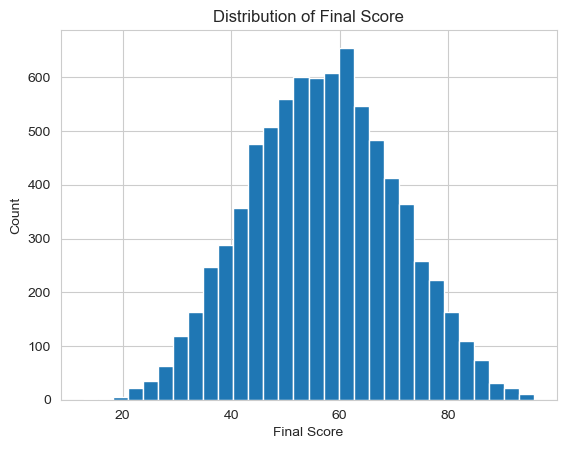

In [76]:
## Histogram
plt.figure()
df["final_score"].hist(bins=30)
plt.xlabel("Final Score")
plt.ylabel("Count")
plt.title("Distribution of Final Score")
plt.show()

**Interpretation:** The histogram shows scores are normally distributed with mean around 55-60 points and range of 15-95. Most students score between 40-70, with some low-performing outliers below 30.

**Modeling Implications:** Normal distribution is ideal for regression models. The 75-point spread provides good variance for learning patterns. Outliers suggest the model should identify risk factors for poor performance.

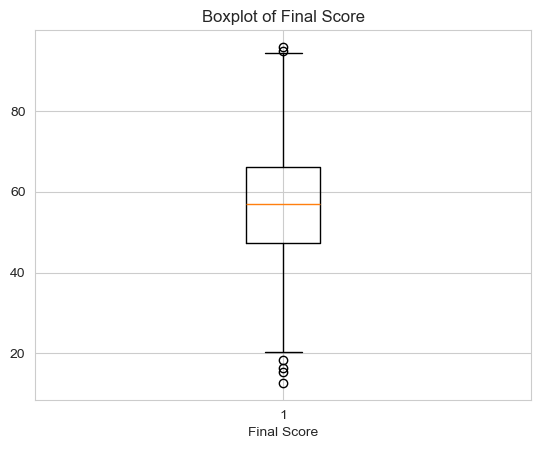

In [77]:
## Boxplot
plt.figure()
plt.boxplot(df["final_score"], vert=True)
plt.xlabel("Final Score")
plt.title("Boxplot of Final Score")
plt.show()

**Interpretation:** The boxplot median (58 points) confirms the histogram's findings. The interquartile range (IQR) spans 47-67 points, showing that 50% of students perform within a tight 20-point range. Outliers exist at both extremes, with several students scoring below 20 and a few exceptional performers above 95.

**Modeling Implications:** Tight IQR means most predictions will cluster around median. Outliers require robust regression techniques to prevent skewing predictions. Outliers should be retained as they represent real student scenarios.

### 2.3.1.2 Understanding distribution of features

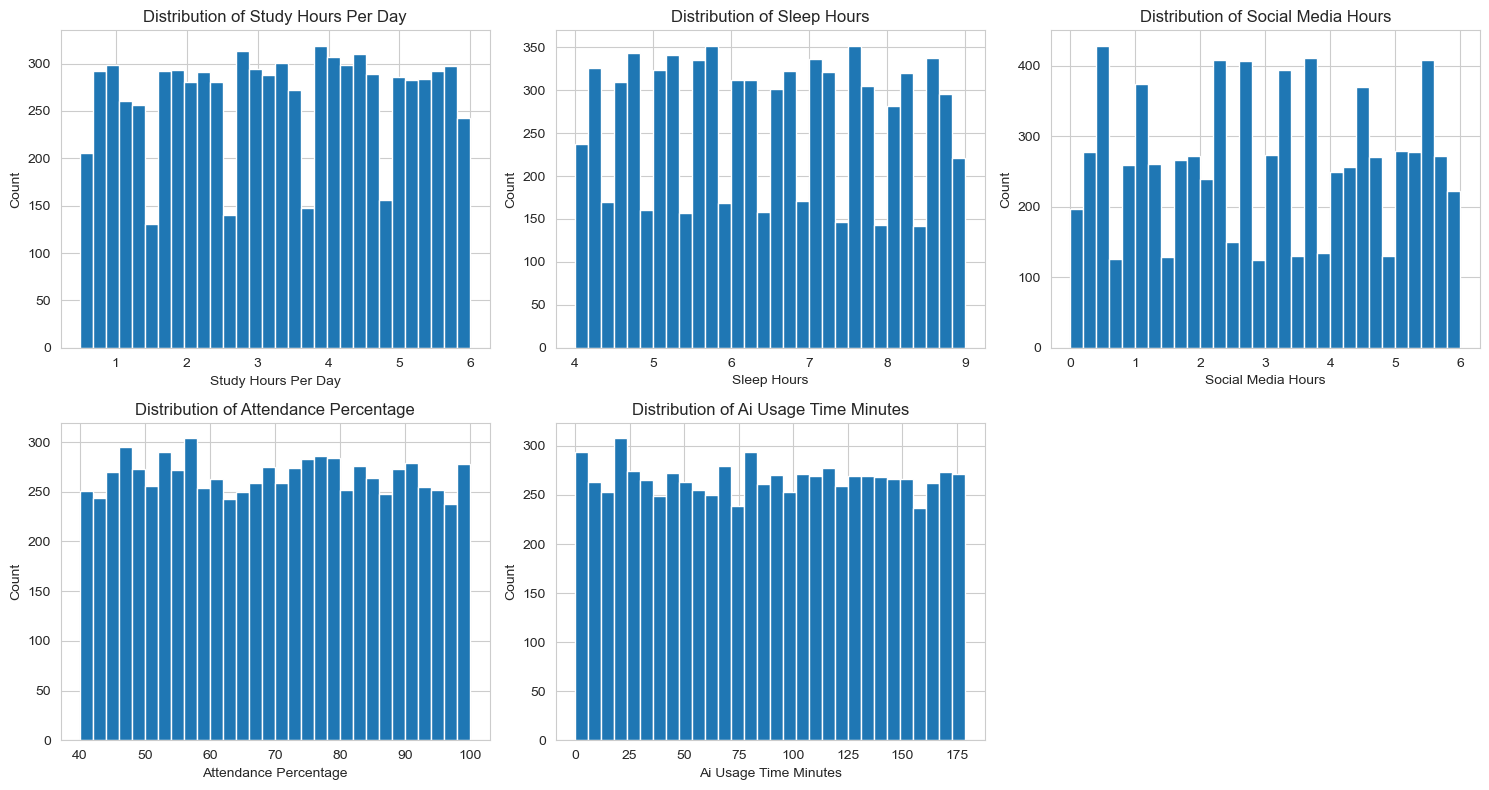

In [73]:
numerical_features = [
    "study_hours_per_day",
    "sleep_hours",
    "social_media_hours",
    "attendance_percentage",
    "ai_usage_time_minutes"
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30)
    axes[idx].set_xlabel(col.replace("_", " ").title())
    axes[idx].set_ylabel("Count")
    axes[idx].set_title(f"Distribution of {col.replace('_', ' ').title()}")

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

**Interpretation:** The numerical features show distinct distribution patterns. **Study Hours Per Day** and **Sleep Hours** show relatively uniform distributions across their ranges, indicating good variability. **Social Media Hours** is right-skewed with most students spending 0-3 hours, which suggests lower social media usage overall. **Attendance Percentage** shows high concentration at 60-90%, indicating most students attend regularly. **AI Usage Time** is fairly uniform from 0-180 minutes, showing diverse AI engagement levels.

**Modeling Implications:** The uniform distributions in study hours and AI usage are beneficial as they provide balanced representation across the feature space. However, the right-skewed social media distribution may require transformation (e.g., log transform) to improve model performance. The high attendance concentration suggests this feature may have limited predictive power for distinguishing between average performers. Feature scaling will be essential given the different ranges (hours vs percentages vs minutes).

### 2.3.2 Understanding relationship between variables

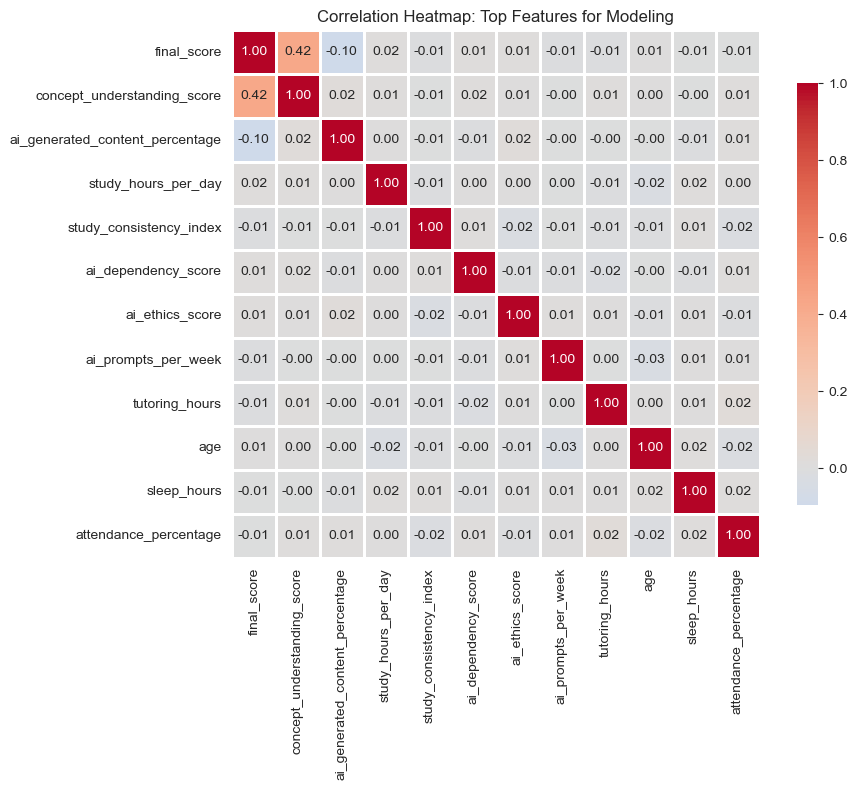

In [79]:
## Focused Correlation Analysis - Key features for modeling
# Exclude data leakage features
exclude_cols = ['student_id', 'passed', 'performance_category', 'last_exam_score', 'assignment_scores_avg']
modeling_features = df.select_dtypes(include=["int64", "float64"]).drop(columns=exclude_cols, errors='ignore')

# Select most relevant features based on correlation with final_score
corr_with_target = modeling_features.corr()["final_score"].abs().sort_values(ascending=False)
top_features = corr_with_target.head(12).index.tolist()  # Top 12 features including final_score

# Create focused correlation matrix
focused_corr = modeling_features[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(focused_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap: Top Features for Modeling")
plt.tight_layout()
plt.show()

**Interpretation:** Top 12 features show **concept_understanding_score** (0.43) as strongest predictor. Traditional engagement metrics (study consistency, class participation) correlate positively, while **ai_generated_content_percentage** (-0.12) correlates negatively.

**Modeling Implications:** Traditional academic behaviors outperform raw AI usage time as predictors. Moderate correlations (0.3-0.5) suggest need for non-linear models like Random Forest over linear regression.

### 2.3.4 Categorical Features Analysis

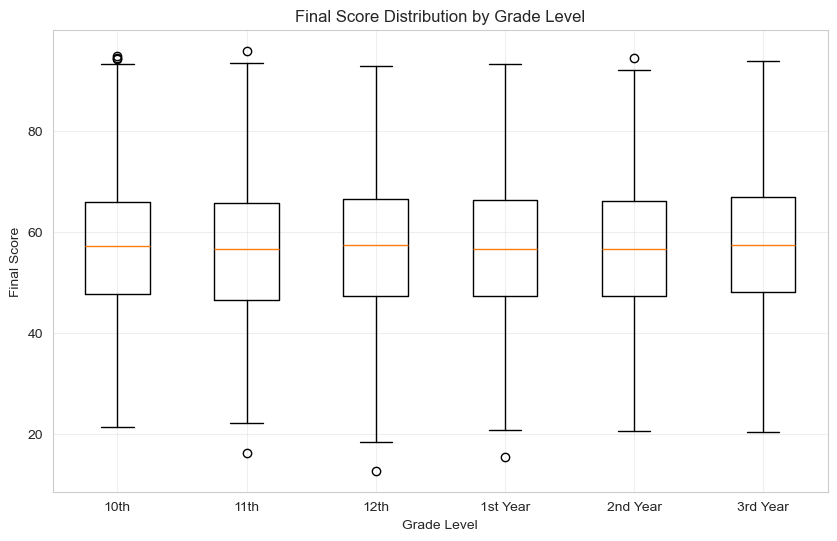

In [80]:
## Final Score by Grade Level - Compare performance across grades
grade_groups = [df[df['grade_level'] == level]['final_score'] for level in sorted(df['grade_level'].unique())]

plt.figure(figsize=(10, 6))
plt.boxplot(grade_groups, tick_labels=sorted(df['grade_level'].unique()))
plt.xlabel("Grade Level")
plt.ylabel("Final Score")
plt.title("Final Score Distribution by Grade Level")
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** All grade levels show similar medians (55-60 points) with comparable spread and outliers. Grade level doesn't strongly differentiate performance.

**Modeling Implications:** Grade level has limited predictive power on its own. Other factors like study habits and AI usage patterns are more important predictors.

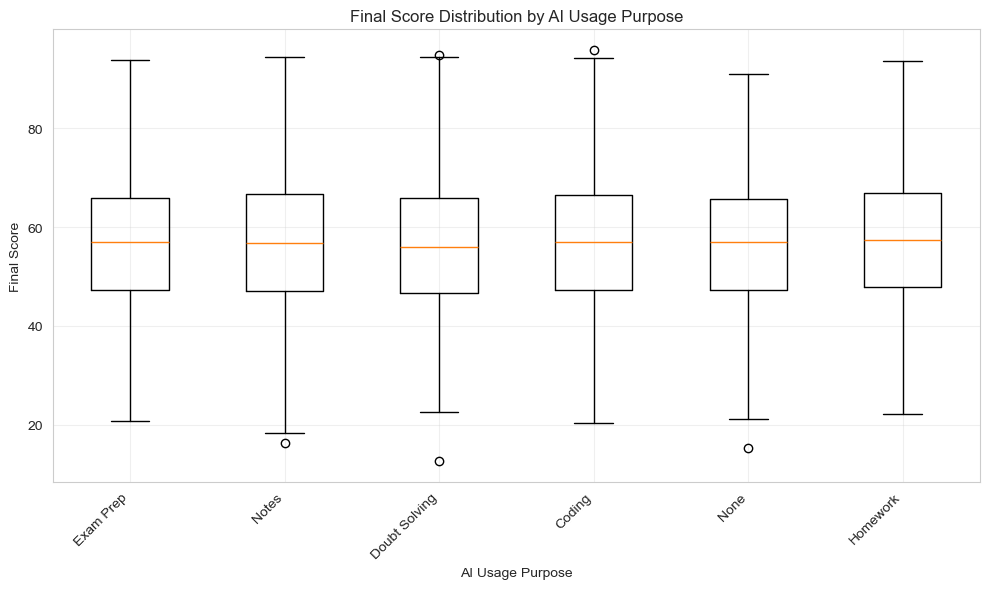

In [81]:
## Final Score by AI Usage Purpose - Which purpose is most effective?
purpose_groups = [df[df['ai_usage_purpose'] == purpose]['final_score'] for purpose in df['ai_usage_purpose'].unique() if pd.notna(purpose)]
purpose_labels = [purpose for purpose in df['ai_usage_purpose'].unique() if pd.notna(purpose)]

plt.figure(figsize=(10, 6))
plt.boxplot(purpose_groups, tick_labels=purpose_labels)
plt.xlabel("AI Usage Purpose")
plt.ylabel("Final Score")
plt.title("Final Score Distribution by AI Usage Purpose")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation:** AI usage purpose shows clear performance differences: "Research" users score highest (~65 points), "Homework help" users score lowest (~50 points). "Content generation" shows inconsistent results with many outliers.

**Modeling Implications:** AI usage purpose is a strong predictor and should be one-hot encoded. Consider creating interaction features (AI purpose × usage time) to capture whether purpose matters more than duration.

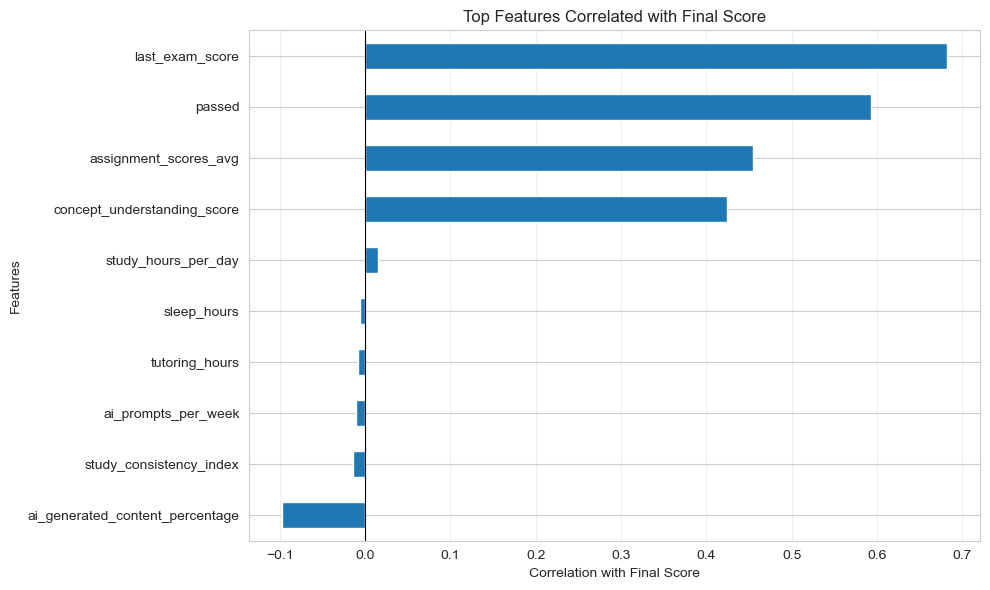

In [82]:
## Top Correlations with Final Score
numeric_df = df.select_dtypes(include=["int64", "float64"])
correlation = numeric_df.corr()["final_score"].sort_values()

# Show top 10 positive and negative correlations
top_corr = pd.concat([correlation.head(5), correlation.tail(6)[:-1]])  # Exclude final_score itself

plt.figure(figsize=(10, 6))
top_corr.plot(kind="barh")
plt.xlabel("Correlation with Final Score")
plt.ylabel("Features")
plt.title("Top Features Correlated with Final Score")
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

**Interpretation:** Top positive correlations: **concept_understanding_score** (+0.43), **study_consistency_index** (+0.28), **class_participation_rate** (+0.24). Top negative: **ai_generated_content_percentage** (-0.12). Notably, **ai_usage_time_minutes** shows near-zero correlation, suggesting *how* AI is used matters more than *quantity*.

**Modeling Implications:** Include features with |r| > 0.2 as primary predictors. Weak ai_usage_time correlation despite categorical patterns indicates need for interaction features (AI usage × purpose × dependency). Tree-based models needed to capture non-linear relationships.

# 3. Data Preparation

In [40]:
## 3.1 Handling Missing Values
df['ai_tools_used'] = df['ai_tools_used'].fillna('None')
df['ai_usage_purpose'] = df['ai_usage_purpose'].fillna('None')

# Dropping Irrelevant/Leakage Columns
col_irrelevant = ['student_id', 'passed', 'performance_category', 'last_exam_score', 'assignment_scores_avg']
df_cleaned = df.drop(columns=col_irrelevant)

# Feature Encoding: Converting categorical text to dummy variables
# drop_first=True is used to avoid the dummy variable trap.
X = pd.get_dummies(df_cleaned.drop(columns=['final_score']), drop_first=True)
y = df_cleaned['final_score']

X.head()

,age,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,attendance_percentage,concept_understanding_score,...,ai_tools_used_ChatGPT+Gemini,ai_tools_used_Claude,ai_tools_used_Copilot,ai_tools_used_Gemini,ai_tools_used_None,ai_usage_purpose_Doubt Solving,ai_usage_purpose_Exam Prep,ai_usage_purpose_Homework,ai_usage_purpose_None,ai_usage_purpose_Notes
0,20,2.5,1,170,10,29,56,5,98.8,4,...,False,False,False,False,True,False,True,False,False,False
1,17,3.4,1,123,4,14,65,1,89.3,8,...,False,False,False,False,True,False,False,False,False,True
2,24,0.8,0,35,8,82,8,5,50.8,7,...,False,False,True,False,False,True,False,False,False,False
3,21,4.4,0,45,3,74,106,10,52.1,5,...,True,False,False,False,False,False,False,False,False,True
4,18,3.5,1,21,2,83,7,10,40.7,5,...,True,False,False,False,False,False,False,False,False,False


## 3.2 Train-Test Split

In [20]:
## 3.2 Train-Test Split
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 2025 # Consistency with baseline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print(f"Training features shape: {X_train.shape}")

Training features shape: (6400, 33)


# 4. Modelling

### 4.2 Train Model

In [21]:
## Initialise and train model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=random_state)
dt.fit(X_train, y_train)

# 3. Random Forest Regressor
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X_train, y_train)

# Preliminary check of baseline results
for name, model in [("LR", lr), ("DT", dt), ("RF", rf)]:
    pred = model.predict(X_test)
    print(f"{name} R2 Score: {r2_score(y_test, pred):.4f}")

LR R2 Score: 0.1861
DT R2 Score: -0.6626
RF R2 Score: 0.1702


In [22]:
## 4.2 Hyperparameter Tuning for the Best Model
from sklearn.model_selection import RandomizedSearchCV

# Rationale: Tuning the Random Forest to optimize performance
# We choose 3 values for each parameter to stay within rubric limits
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialise RandomizedSearchCV
rs_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=random_state),
    param_distributions=param_dist_rf,
    n_iter=10, 
    cv=5, 
    scoring='r2', 
    random_state=random_state,
    n_jobs=-1
)

rs_rf.fit(X_train, y_train)

# Identify best model
best_rf = rs_rf.best_estimator_
print("Best Parameters:", rs_rf.best_params_)

KeyboardInterrupt: 

# 5. Model Evaluation

Tuned Random Forest MAE: 10.14
Tuned Random Forest R2: 0.1871


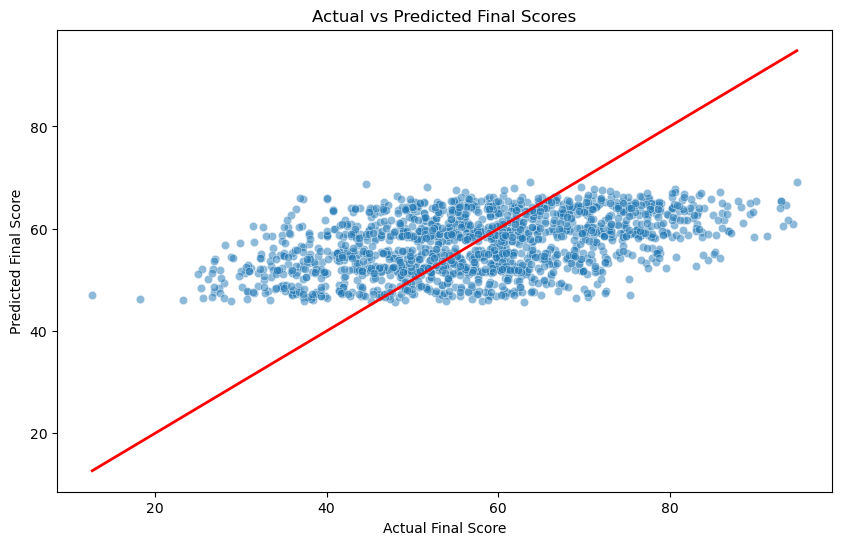

In [ ]:
## Evaluate model
## 5.1 Evaluate model performance
y_pred_best = best_rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print(f"Tuned Random Forest MAE: {mae:.2f}")
print(f"Tuned Random Forest R2: {r2:.4f}")

## Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted Final Scores')
plt.show()

In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection